# Gradient Descents finds Global Minimum

In [ ]:
import tensorflow as tf
from tensorflow.python.framework import ops
ops.reset_default_graph()
print(tf.__version__)

2.2.0


In [ ]:
import keras as k
print(k.__version__)

2.3.1


Using TensorFlow backend.


In [ ]:
from keras.datasets import mnist

In [ ]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [ ]:
train_images.shape

(60000, 28, 28)

In [ ]:
test_images.shape

(10000, 28, 28)

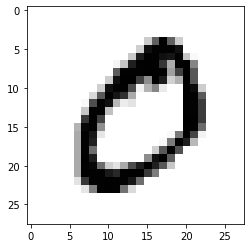

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

image = np.reshape(train_images[1], (28,28))
plt.imshow(image, cmap='gray_r')
plt.show()

In [ ]:
train_labels.shape

(60000,)

In [ ]:
train_images = train_images.reshape((60000, 28*28))
train_images = train_images.astype('float32')/255
test_images = test_images.reshape((10000, 28*28))
test_image = test_images.astype('float32')/255

In [ ]:
from tensorflow.keras.utils import to_categorical
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [ ]:
x_val = train_images[:10000]
x_train = train_images[10000:]

y_val = train_labels[:10000]
y_train = train_labels[10000:]

__Network model with three layer neural network__

In [ ]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Dense(15, activation='relu',input_shape=(28*28,)))
model.add(layers.Dense(15, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

# **Under-parameterization**

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 15)                11775     
_________________________________________________________________
dense_2 (Dense)              (None, 15)                240       
_________________________________________________________________
dense_3 (Dense)              (None, 10)                160       
Total params: 12,175
Trainable params: 12,175
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from keras import optimizers
model.compile(optimizer=optimizers.RMSprop(lr=0.001), loss='categorical_crossentropy', metrics=['acc'])

In [ ]:
history = model.fit(x_train, y_train,
                    epochs=5,
                    batch_size=128,
                    validation_data=(x_val, y_val))

Train on 50000 samples, validate on 10000 samples
Epoch 1/5
50000/50000 [==============================] - 2s 39us/step - loss: 0.7263 - acc: 0.8062 - val_loss: 0.3690 - val_acc: 0.8995
Epoch 2/5
50000/50000 [==============================] - 2s 32us/step - loss: 0.3255 - acc: 0.9072 - val_loss: 0.3002 - val_acc: 0.9142
Epoch 3/5
50000/50000 [==============================] - 2s 34us/step - loss: 0.2744 - acc: 0.9208 - val_loss: 0.2616 - val_acc: 0.9245
Epoch 4/5
50000/50000 [==============================] - 2s 34us/step - loss: 0.2453 - acc: 0.9287 - val_loss: 0.2450 - val_acc: 0.9276
Epoch 5/5
50000/50000 [==============================] - 2s 34us/step - loss: 0.2253 - acc: 0.9353 - val_loss: 0.2235 - val_acc: 0.9350


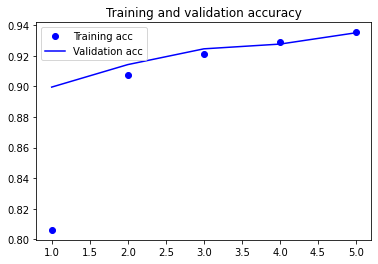

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']

loss= history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.show()

__increasing the number of neurons in the layer helps gradient descent find global minimum__

In [ ]:
model = models.Sequential()
model.add(layers.Dense(500, activation='relu',input_shape=(28*28,)))
model.add(layers.Dense(500, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

# **Over-parameterization**

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 500)               392500    
_________________________________________________________________
dense_5 (Dense)              (None, 500)               250500    
_________________________________________________________________
dense_6 (Dense)              (None, 10)                5010      
Total params: 648,010
Trainable params: 648,010
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from keras import optimizers
model.compile(optimizer=optimizers.RMSprop(lr=0.001), loss='categorical_crossentropy', metrics=['acc'])

In [ ]:
history = model.fit(x_train, y_train,
                    epochs=5,
                    batch_size=128,
                    validation_data=(x_val, y_val))

Train on 50000 samples, validate on 10000 samples
Epoch 1/5
50000/50000 [==============================] - 2s 35us/step - loss: 0.2446 - acc: 0.9242 - val_loss: 0.1293 - val_acc: 0.9608
Epoch 2/5
50000/50000 [==============================] - 2s 33us/step - loss: 0.0890 - acc: 0.9722 - val_loss: 0.0920 - val_acc: 0.9725
Epoch 3/5
50000/50000 [==============================] - 2s 33us/step - loss: 0.0577 - acc: 0.9819 - val_loss: 0.0892 - val_acc: 0.9763
Epoch 4/5
50000/50000 [==============================] - 2s 32us/step - loss: 0.0415 - acc: 0.9870 - val_loss: 0.0775 - val_acc: 0.9805
Epoch 5/5
50000/50000 [==============================] - 2s 31us/step - loss: 0.0312 - acc: 0.9906 - val_loss: 0.0826 - val_acc: 0.9776


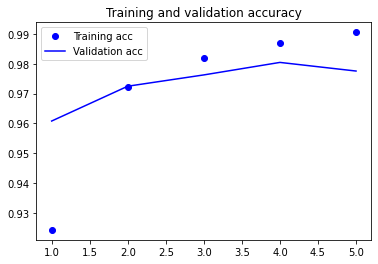

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']

loss= history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.show()

**number of parameter = number of samples** to find Global Minima

In [ ]:
model = models.Sequential()
model.add(layers.Dense(61, activation='relu',input_shape=(28*28,)))
model.add(layers.Dense(30, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

# **Practicle degree of parameterization**

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 61)                47885     
_________________________________________________________________
dense_8 (Dense)              (None, 30)                1860      
_________________________________________________________________
dense_9 (Dense)              (None, 10)                310       
Total params: 50,055
Trainable params: 50,055
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from keras import optimizers
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc'])

In [ ]:
history = model.fit(x_train, y_train,
                    epochs=5,
                    batch_size=256,
                    validation_data=(x_val, y_val))

Train on 50000 samples, validate on 10000 samples
Epoch 1/5
50000/50000 [==============================] - 1s 19us/step - loss: 0.5488 - acc: 0.8520 - val_loss: 0.2720 - val_acc: 0.9213
Epoch 2/5
50000/50000 [==============================] - 1s 17us/step - loss: 0.2395 - acc: 0.9305 - val_loss: 0.2053 - val_acc: 0.9393
Epoch 3/5
50000/50000 [==============================] - 1s 18us/step - loss: 0.1828 - acc: 0.9460 - val_loss: 0.1871 - val_acc: 0.9458
Epoch 4/5
50000/50000 [==============================] - 1s 18us/step - loss: 0.1492 - acc: 0.9567 - val_loss: 0.1466 - val_acc: 0.9576
Epoch 5/5
50000/50000 [==============================] - 1s 17us/step - loss: 0.1260 - acc: 0.9626 - val_loss: 0.1399 - val_acc: 0.9594


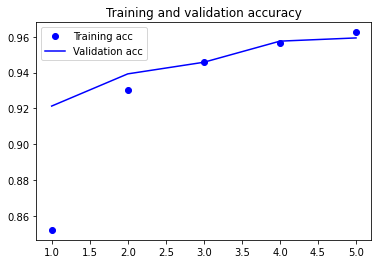

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']

loss= history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.show()

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

10000/10000 [==============================] - 1s 64us/step


In [ ]:
test_acc

0.9580000042915344